## SALES FORECASTING SYSTEM

### EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Unit price : mu = 55.67,sigma=26.48
Unit price : Skewness: 0.01
Unit price : Kurtosis: -1.22


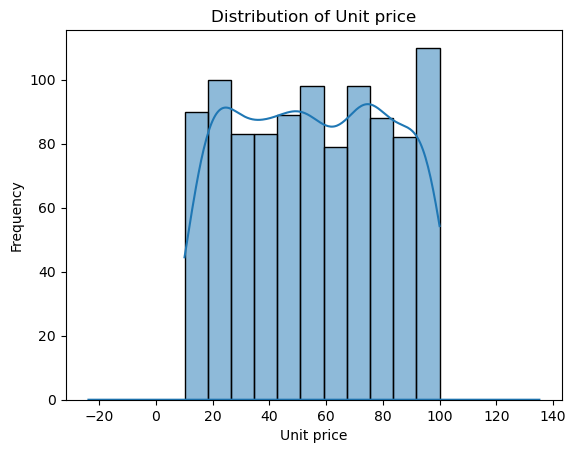

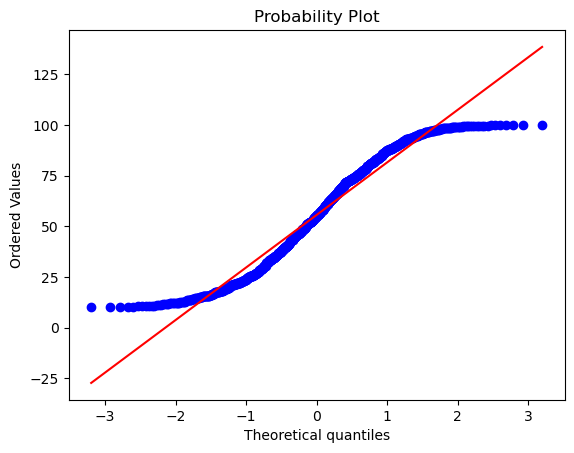

Total : mu = 322.97,sigma=245.76
Total : Skewness: 0.89
Total : Kurtosis: -0.08


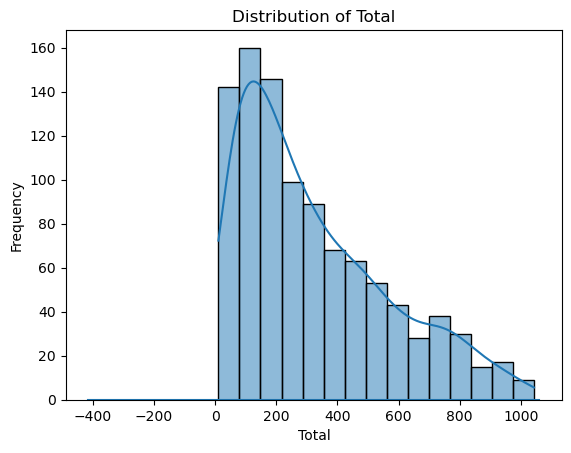

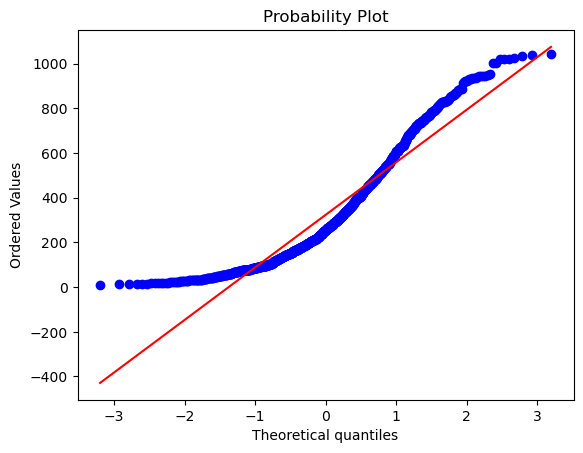

Rating : mu = 6.97,sigma=1.72
Rating : Skewness: 0.01
Rating : Kurtosis: -1.15


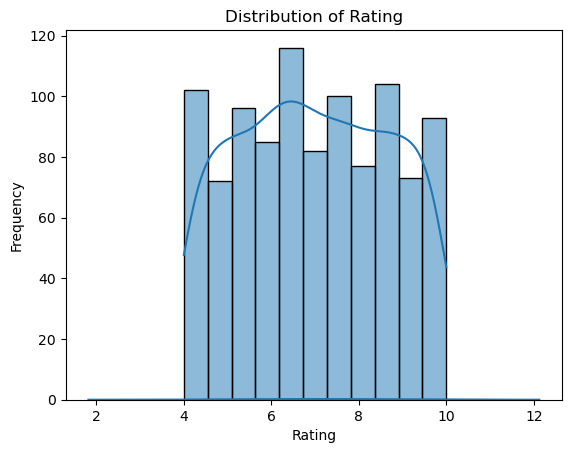

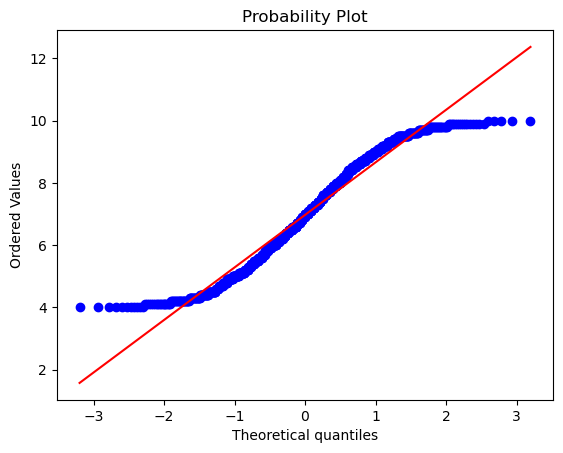

gross income : mu = 15.38,sigma=11.70
gross income : Skewness: 0.89
gross income : Kurtosis: -0.08


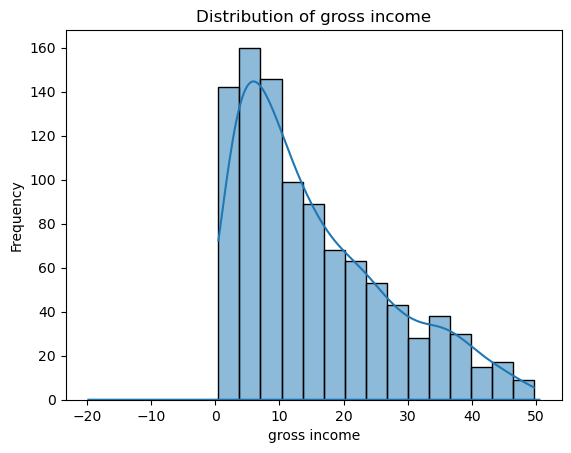

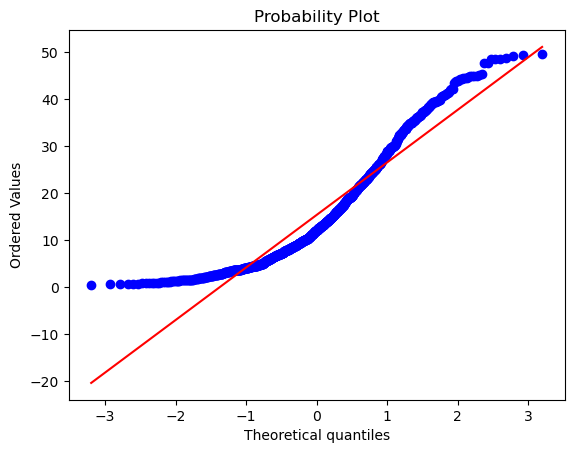

In [19]:
columns = ['Unit price','Total','Rating','gross income']

# Plot the distribution of the data

for col in columns:
    sns.histplot(df[col],kde=True)
    
    # Fit a normal distribution to the data
    
    (mu,sigma) = stats.norm.fit(df[col])
    print('{} : mu = {:.2f},sigma={:.2f}'.format(col,mu,sigma))
    
    # Calculate the skewness and kurtosis of the data
    
    print('{} : Skewness: {:.2f}'.format(col,df[col].skew()))
    print('{} : Kurtosis: {:.2f}'.format(col,df[col].kurt()))
    
    # Add the fitted normal distribution to the plot
    
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 180)
    y = stats.norm.pdf(x,mu,sigma)
    plt.plot(x,y,label = 'Normal Fit')
    
    # Add labels and title to the plot
    
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(col))
    
    # Plot the QQ-plot
    
    fig = plt.figure()
    stats.probplot(df[col],plot=plt)
    
    plt.show()

#### Unit Price Distribution

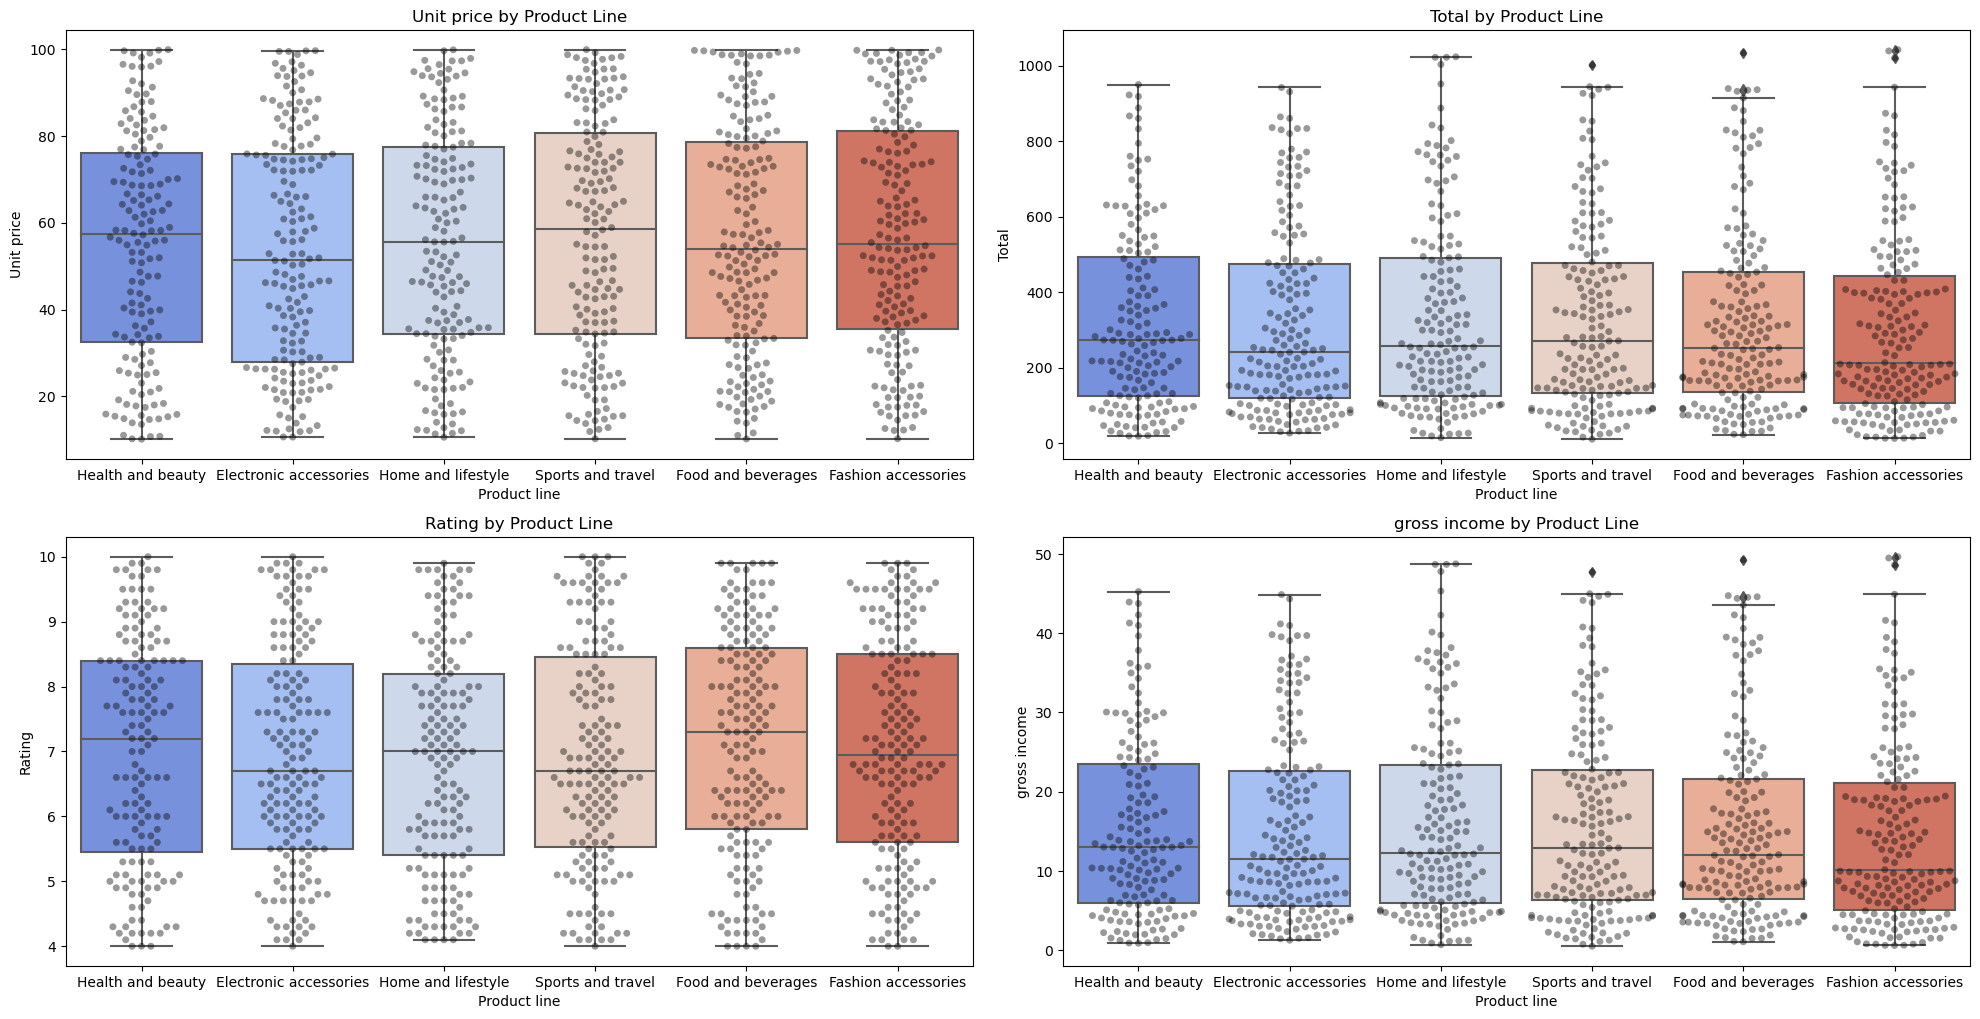

In [21]:
# Box plots and Swarm plots

columns = ['Unit price','Total','Rating','gross income']

plt.figure(figsize=(20,20))

for i, column in enumerate(columns):
    plt.subplot(len(columns),2,i+1)
    sns.boxplot(x='Product line',y=column,data=df,palette='coolwarm')
    sns.swarmplot(x='Product line',y=column,data=df,color='black',alpha=0.4)
    plt.title(f'{column} by Product Line')

plt.tight_layout()
plt.show()

#### Transaction Density during open hours

In [22]:
df['Time'] = pd.to_datetime(df['Time'])
df = df[(df['Time'].dt.hour >=10) & (df['Time'].dt.hour < 21)]

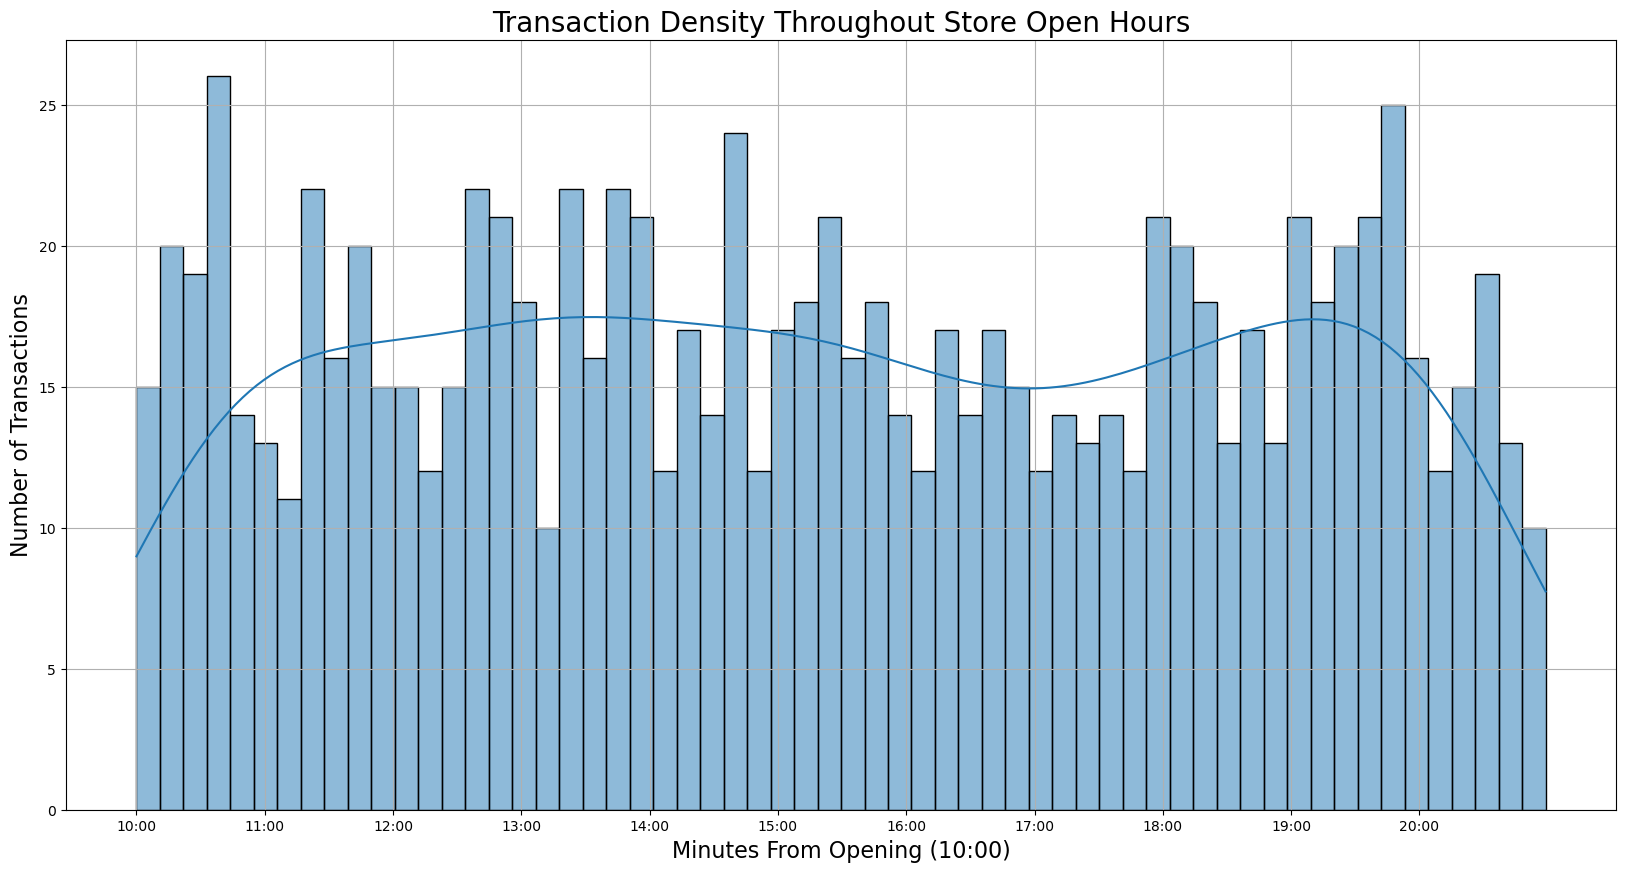

In [24]:
df['MinutesFromOpening'] = (df['Time'].dt.hour -10) * 60 + df['Time'].dt.minute

# Create a distribution plot to visualize the transaction density

plt.figure(figsize=(20,10))
sns.histplot(data = df, x = 'MinutesFromOpening', bins=60, kde = True)
plt.title('Transaction Density Throughout Store Open Hours', fontsize = 20)
plt.xlabel('Minutes From Opening (10:00)', fontsize = 16)
plt.ylabel('Number of Transactions', fontsize = 16)
plt.xticks(np.arange(0,660,60),[f"{10+t//60:02d}:{t%60:02d}" for t in np.arange(0,660,60)])
plt.grid(True)
plt.show()

#### Check Distribution

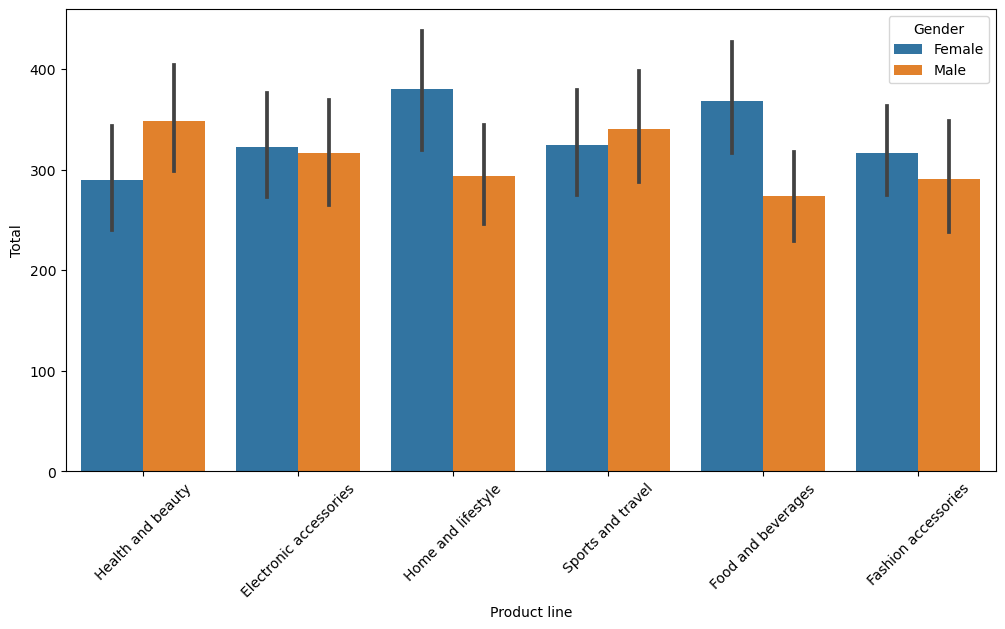

In [27]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Product line', y = 'Total', hue = 'Gender', data = df)
plt.xticks(rotation = 45)
plt.show()

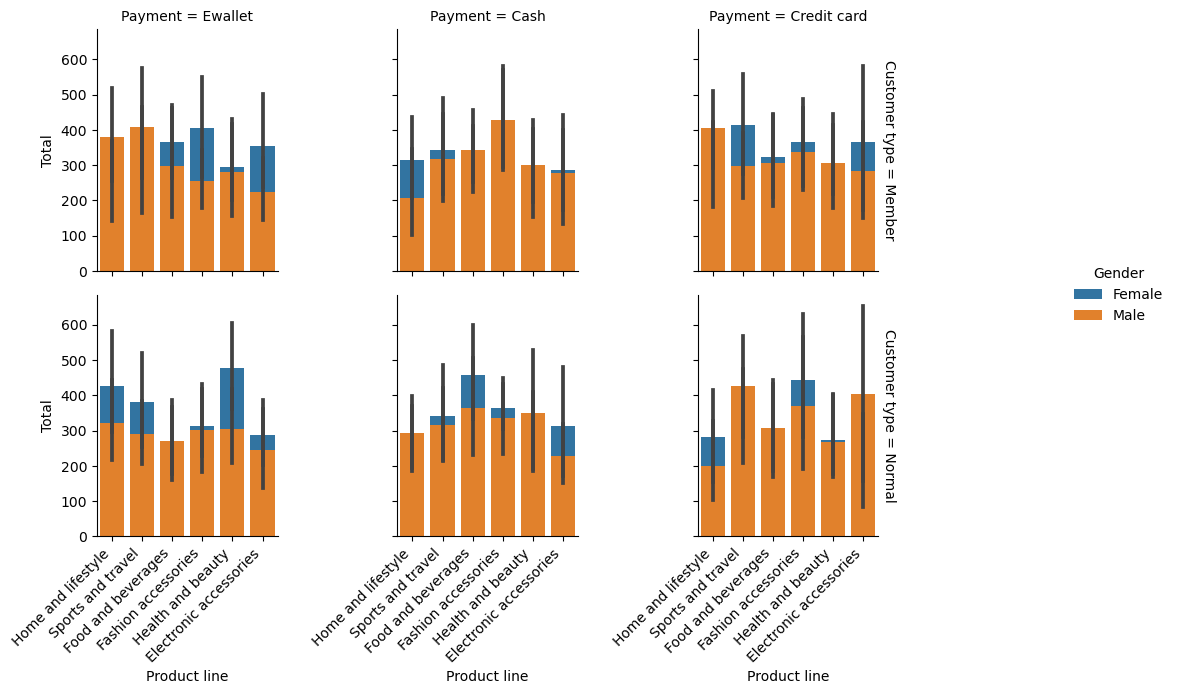

In [30]:
g = sns.FacetGrid(df, col = 'Payment', row = 'Customer type', hue = 'Gender', margin_titles = True)
g.map(sns.barplot, 'Product line','Total')

g.add_legend(title='Gender', bbox_to_anchor=(1.05,0.5), loc='center left', borderaxespad = 0)

for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 45, ha = 'right', fontsize = 10)
    
plt.show()

#### Weekly Sales by City

In [31]:
df['Date'] = pd.to_datetime(df['Date'])
weekly_data = df.groupby(['City',pd.Grouper(key='Date',freq='W')])['Total'].sum().reset_index()

In [32]:
mean_total_sales = weekly_data.groupby('Date')['Total'].mean().reset_index()
mean_total_sales.rename(columns={'Total': 'Mean Total Sales'}, inplace = True)

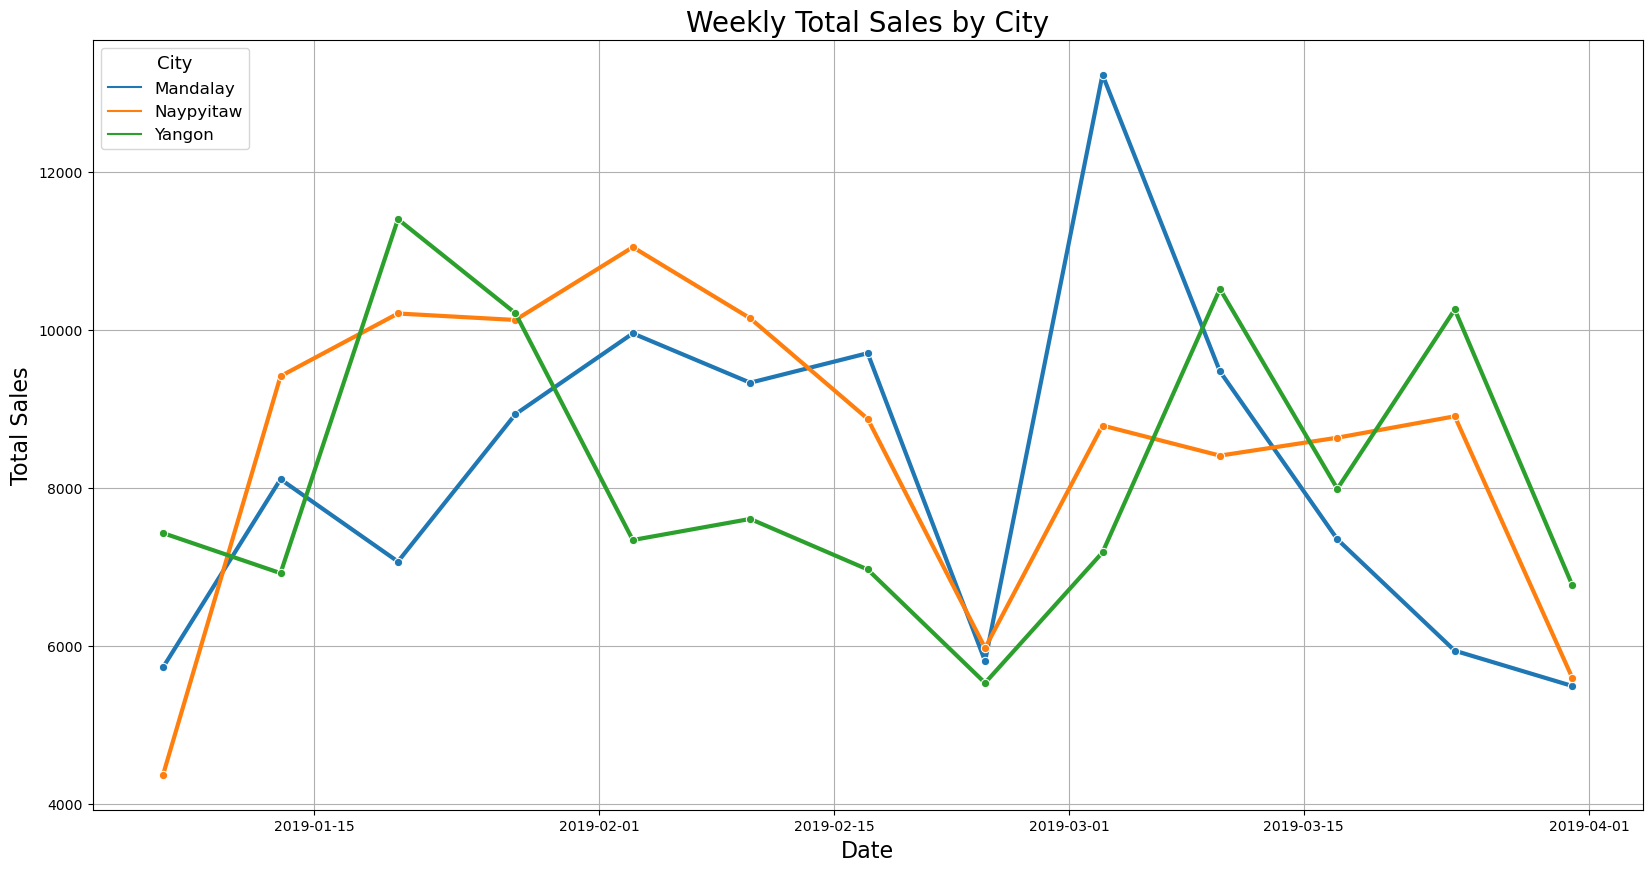

In [33]:
plt.figure(figsize = (20,10))
sns.lineplot(x='Date',y='Total',hue='City',data=weekly_data,marker='o',linewidth=3)
plt.title('Weekly Total Sales by City', fontsize = 20)
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Total Sales', fontsize = 16)
plt.grid(True)
plt.legend(title = 'City', title_fontsize = '13', loc='upper left',fontsize='12')
plt.show()


#### Comparison of Sales between Branches

In [34]:
df['Month'] = df['Date'].dt.month

In [35]:
grouped_data = df.groupby(['City','Month'])['Total'].sum().reset_index()

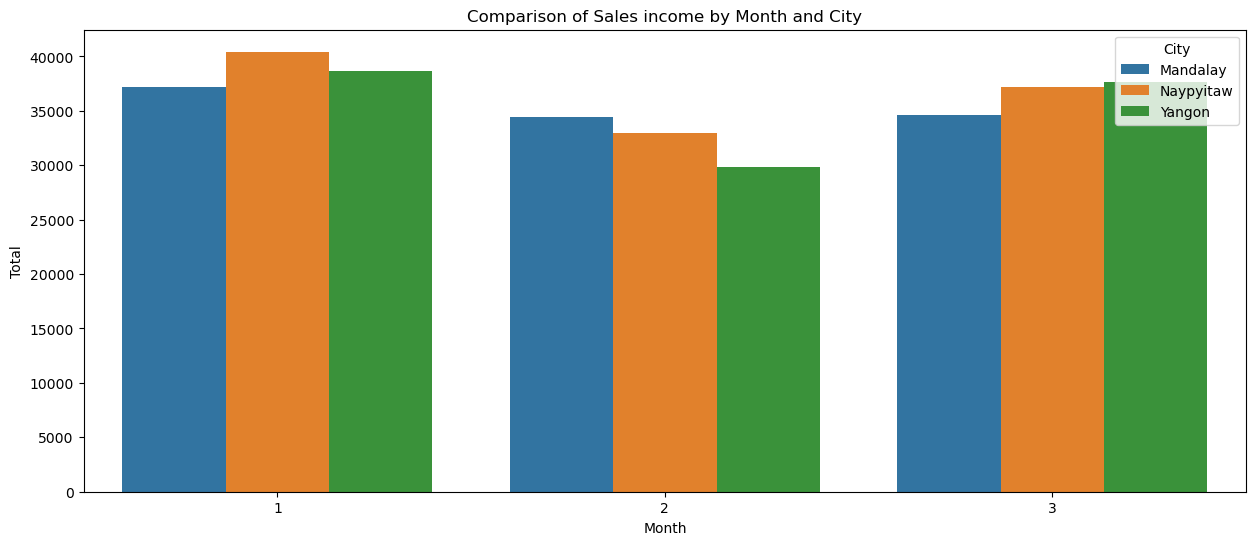

In [36]:
plt.figure(figsize = (15,6))
sns.barplot(x='Month',y='Total',hue='City',data=grouped_data)
plt.title('Comparison of Sales income by Month and City')
plt.xlabel('Month')
plt.ylabel('Total')
plt.legend(title='City',loc='upper right')
plt.show()

### PREDICTION

In [37]:
df = pd.read_csv('dataset.csv')

In [40]:
df['Date'] = pd.to_datetime(df['Date'])

df['day_of_week'] = df['Date'].dt.dayofweek
df['day_of_month'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df['Time'] = pd.to_datetime(df['Time'])

def map_time_interval(time):
    hour = time.hour
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'
    
df['time_interval'] = df['Time'].apply(map_time_interval)

In [41]:
data_encoded = pd.get_dummies(df,columns=['City','Customer type','Gender','Product line','time_interval'],drop_first=True)

In [42]:
data_encoded.drop(['Invoice ID','Date','Time','Tax 5%','gross margin percentage','cogs','year'],axis=1,inplace=True)

In [43]:
categorical_columns = data_encoded.select_dtypes(include=['object']).columns

In [46]:
categorical_columns

Index(['Branch', 'Payment'], dtype='object')

In [48]:
data_encoded = pd.get_dummies(data_encoded,columns = categorical_columns,drop_first = True)

In [49]:
X = data_encoded.drop('Rating',axis=1)
y = data_encoded['Rating']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform (X_train)
X_test = scaler.transform(X_test)

In [52]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter = 1000)
}

results = {}

for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    print(f"{name}:{r2}")
    

Linear Regression:-0.04535762914568542
Decision Tree:-1.0408296817738814
Random Forest:-0.09762456981626233
SVR:-0.14853412620874074
KNN:-0.2955260143391403
Neural Network:-0.4665626543616228


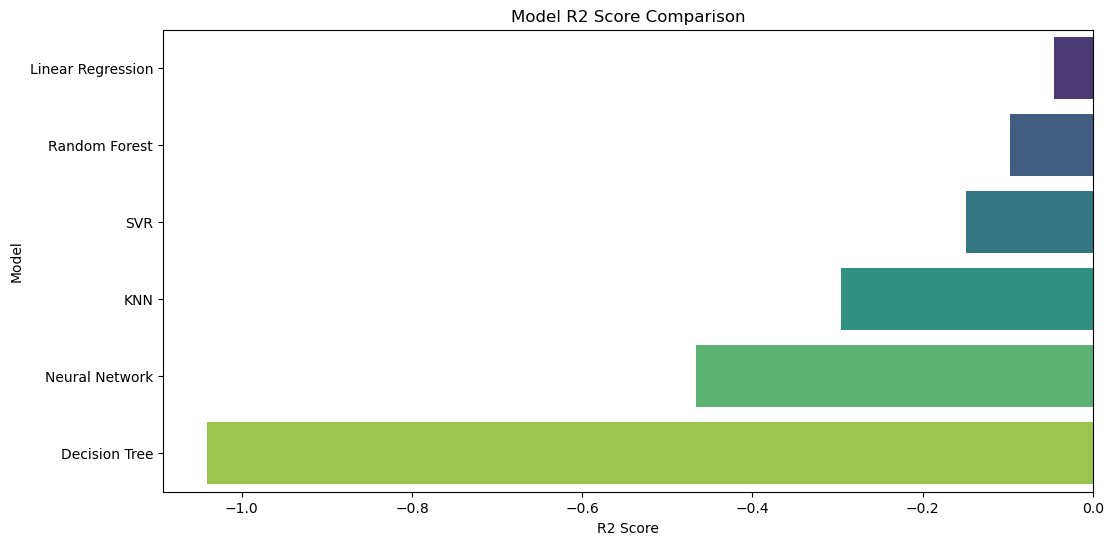

In [53]:
results_df = pd.DataFrame({"Model": list(results.keys()), "R2 Score": list(results.values())})
results_df = results_df.sort_values(by="R2 Score", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="R2 Score", y="Model", palette="viridis")
plt.title("Model R2 Score Comparison")
plt.xlabel("R2 Score")
plt.ylabel("Model")
plt.show()

The results show that all the models have negative R2 scores, which indicates that they are worse than predicting the mean value of the target variable. This suggests that our current approach is not effective in predicting the 'Rating' variable.

There could be several reasons for this poor performance:
The features in the dataset might not have a strong relationship with the 'Rating' variable. We might need to collect additional features or create better feature interactions to improve the model performance.

The default hyperparameters used for the models might not be optimal for this dataset. We could try performing hyperparameter tuning using methods like GridSearchCV or RandomizedSearchCV to find the best set of hyperparameters for each model.

The dataset is small (1,000 rows), the models might struggle to learn the underlying patterns. We could try collecting more data or using techniques like data augmentation to increase the size of the training dataset.

It is also possible that the 'Rating' variable is inherently difficult to predict based on the available features. In this case, we may need to reconsider the problem definition or the target variable itself.